In [1]:
options nosource nonotes errors=0;
filename nat1 url "https://uofi.box.com/shared/static/gb07nz7jafspk65wzxq6awlu02kypiq7.csv" termstr=crlf;
filename nat2 url "https://uofi.box.com/shared/static/kr2s5wp3jpxdlpcjmq2qs15oo4797u4y.csv" termstr=crlf;
filename nat3 url "https://uofi.box.com/shared/static/hwsoobqngb8zfyjbwxvmrejjz1lg3yeh.csv" termstr=crlf;
proc import datafile=nat1 out=birth01(keep = FAGECOMB dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat2 out=birth02(keep = FAGECOMB dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;
proc import datafile=nat3 out=birth03(keep = FAGECOMB dplural CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC dbwt) replace dbms=csv; 
run;


SAS Connection established. Subprocess id is 2682



In [54]:
data birtha;
 set birth01 birth02 birth03;
 dbwtlbs = dbwt/454;
 agegap = abs(MAGER - FAGECOMB);
 if agegap > 10 and agegap < 20 then agegap1020 = 1;
  else agegap1020 = 0;
 if agegap >= 20 then agegap20 = 1;
  else agegap20 = 0;
 if CA_ANEN='Y' or CA_MNSB='Y' or CA_CCHD='Y' or CA_CDH='Y' or CA_OMPH='Y' or CA_GAST='Y' or CA_LIMB='Y' or CA_CLEFT='Y' or CA_CLPAL='Y' or CA_DOWN='C' or CA_DISOR='C' or CA_HYPO='Y' then congenital_anomaly_bin=1;
  else congenital_anomaly_bin=0;
 if dplural=2 and dbwt ne 9999 and OEGest_R3 ne 3 and FAGECOMB ne 99 and MEDUC ne 9 and FEDUC ne 9 and PREVIS_REC ne 9 and wtgain ne 99 and dmeth_rec ne 9;
 keep agegap20 agegap1020 agegap dplural OEGest_R3 SEX MAGER FAGECOMB MEDUC FEDUC PREVIS_REC CIG_REC WTGAIN DMETH_REC congenital_anomaly_bin dbwtlbs;
run;
options source notes errors=20;

In [55]:
proc print data=birtha (obs=10);
run;

Obs,MAGER,MEDUC,FAGECOMB,FEDUC,PREVIS_REC,CIG_REC,WTGAIN,DMETH_REC,DPLURAL,SEX,OEGEST_R3,dbwtlbs,agegap,agegap1020,agegap20,congenital_anomaly_bin
1,30,6,30,7,8,N,43,1,2,M,1,6.11233,0,0,0,0
2,30,6,30,7,8,N,43,1,2,F,1,5.04405,0,0,0,0
3,27,4,38,4,7,N,68,1,2,F,2,6.61894,11,1,0,0
4,27,4,38,4,7,N,68,1,2,F,2,5.87004,11,1,0,0
5,37,4,37,3,7,N,25,1,2,M,1,5.77093,0,0,0,0
6,37,4,37,3,7,N,25,1,2,F,1,5.30837,0,0,0,0
7,21,3,22,3,7,N,32,2,2,F,1,3.86564,1,0,0,0
8,21,3,22,3,7,N,32,2,2,M,1,3.87665,1,0,0,0
9,34,6,41,6,10,N,27,2,2,F,2,6.97137,7,0,0,0
10,34,6,41,6,10,N,27,2,2,M,2,6.35463,7,0,0,0



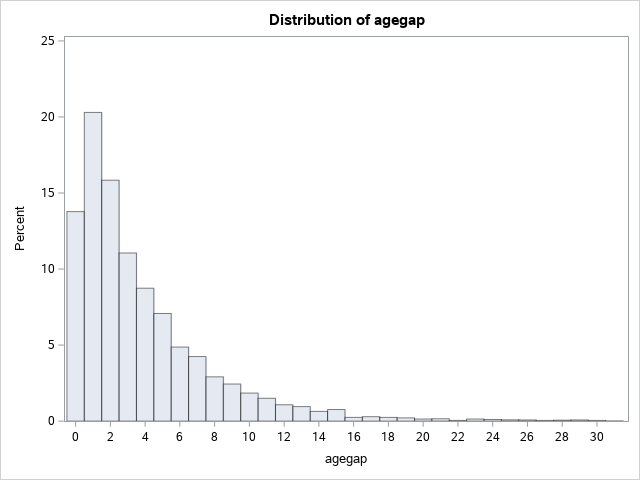

In [42]:
proc univariate data=birtha;
 histogram agegap;
 ods select histogram;
run;

Does the age gap matter?


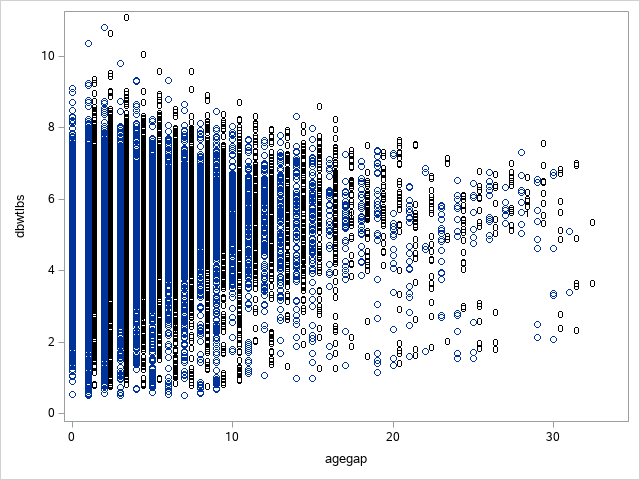

In [51]:
PROC sgscatter  DATA = birtha;
   PLOT dbwtlbs * agegap / datalabel = congenital_anomaly_bin;
RUN;


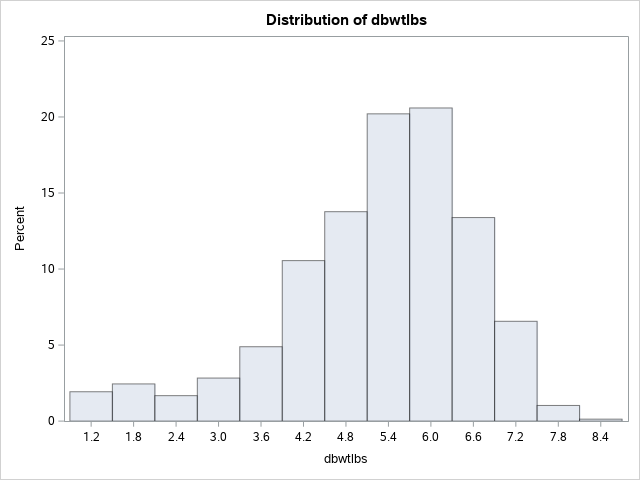

In [62]:
proc univariate data=birtha;
 where agegap1020 = 1;
 histogram dbwtlbs;
 ods select histogram;
run;


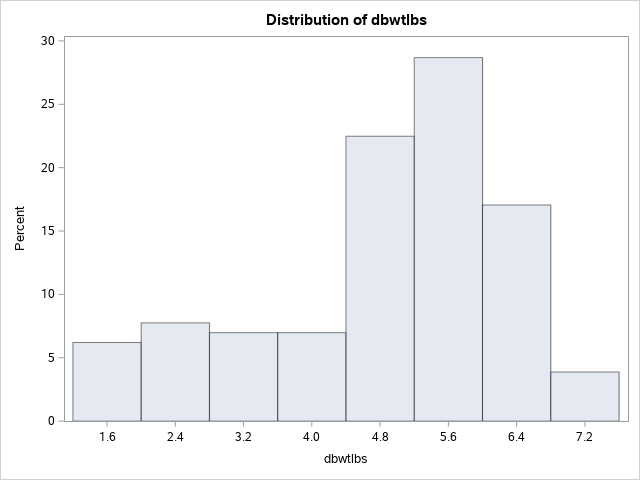

In [65]:
proc univariate data=birtha;
 where agegap20 = 1;
 histogram dbwtlbs;
 ods select histogram;
run;


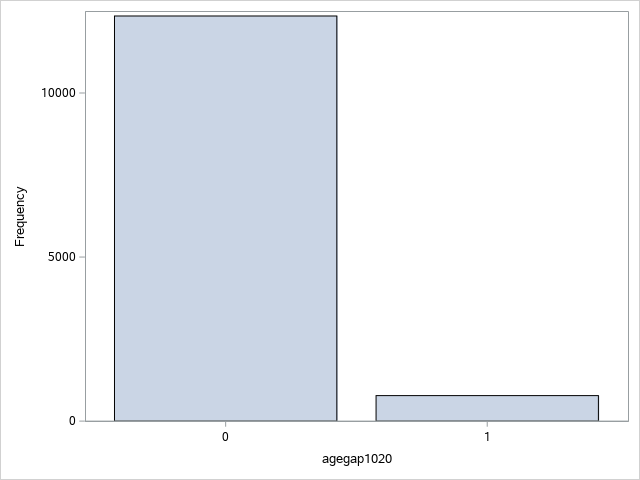

Create age gap var. abs value of mager - facecomb. Run linear reg? idk